In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Create binary flags from date columns
df['clicked'] = df['click_date'].notna().astype(int)
df['converted'] = df['transaction_date'].notna().astype(int)

# Verify
df[['clicked', 'converted']].head()


,clicked,converted
0,1,0


In [28]:
cpt = pd.crosstab(
    df['clicked'],
    df['converted'],
    normalize='index'
).reindex(index=[0, 1], columns=[0, 1], fill_value=0)

cpt.index = ['Not Clicked', 'Clicked']
cpt.columns = ['Not Converted', 'Converted']

cpt


,Not Converted,Converted
Not Clicked,0.0,0.0
Clicked,1.0,0.0


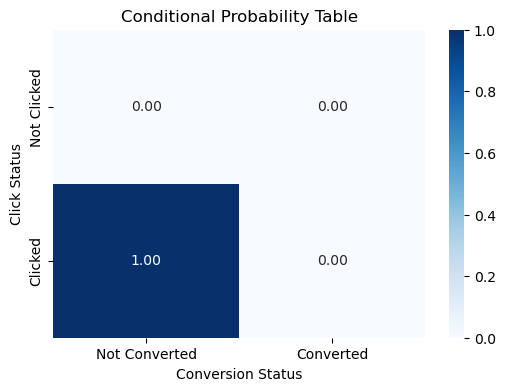

In [29]:
plt.figure(figsize=(6,4))
sns.heatmap(cpt, annot=True, cmap='Blues', fmt=".2f")
plt.title("Conditional Probability Table")
plt.xlabel("Conversion Status")
plt.ylabel("Click Status")
plt.show()


In [10]:
p_click = df['clicked'].mean()
print("P(Click) =", p_click)

P(Click) = 1.0


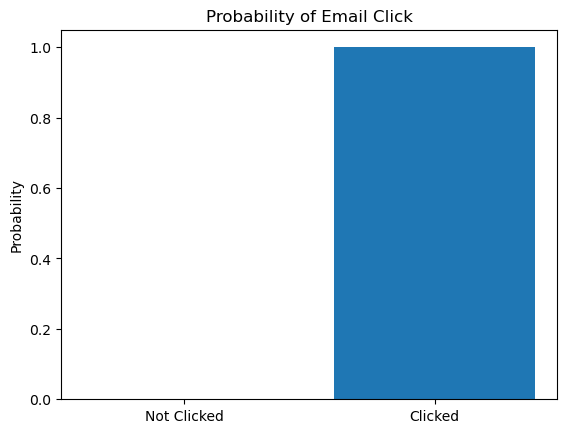

In [11]:
plt.bar(['Not Clicked', 'Clicked'], [1 - p_click, p_click])
plt.title("Probability of Email Click")
plt.ylabel("Probability")
plt.show()

In [12]:
if df['clicked'].sum() > 0:
    p_convert_given_click = df[df['clicked'] == 1]['converted'].mean()
else:
    p_convert_given_click = 0

print("P(Convert | Click) =", p_convert_given_click)

P(Convert | Click) = 0.0


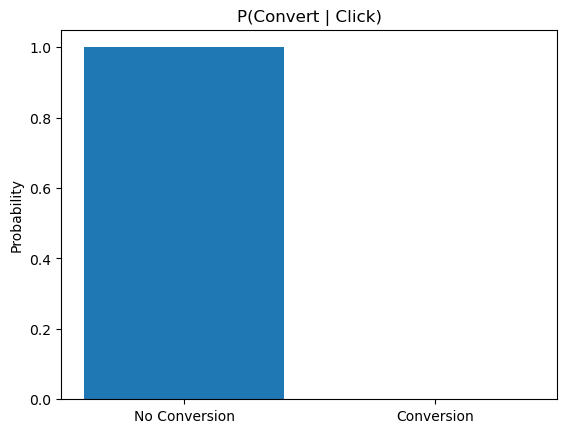

In [13]:
plt.bar(['No Conversion', 'Conversion'],
        [1 - p_convert_given_click, p_convert_given_click])
plt.title("P(Convert | Click)")
plt.ylabel("Probability")
plt.show()

In [30]:
cpt = pd.crosstab(
    df['clicked'],
    df['converted'],
    normalize='index'
).reindex(index=[0, 1], columns=[0, 1], fill_value=0)

cpt.index = ['Not Clicked', 'Clicked']
cpt.columns = ['Not Converted', 'Converted']

cpt


,Not Converted,Converted
Not Clicked,0.0,0.0
Clicked,1.0,0.0


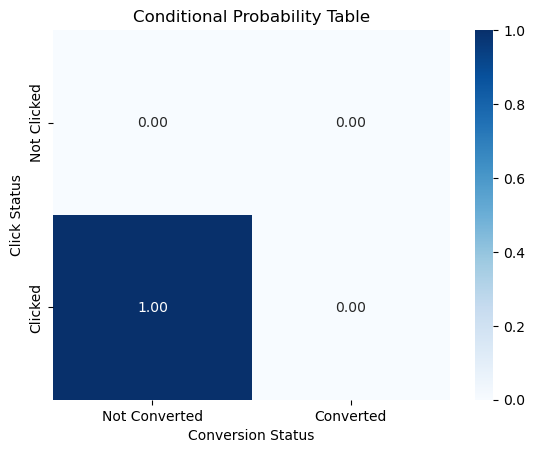

In [31]:
sns.heatmap(cpt, annot=True, cmap='Blues', fmt=".2f")
plt.title("Conditional Probability Table")
plt.xlabel("Conversion Status")
plt.ylabel("Click Status")
plt.show()